image: geopandas.png title: Machine Learning subtitle: 1D and 2D partial dependent plots with RandomForestClassifier and DecisionTreeClassifier date: '2024-01-13' categories: [Python, Machine Learning, Data Analysis] author: Kunal Khurana jupyter: python3 toc: True

<a id="1"></a>
 <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 1. Partial Dependence Plots </b></div>

- Uses

> shows how features affect prediction

> calculated after the model has been fit

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv('FIFA 2018 Statistics.csv')
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)

In [3]:
from sklearn import tree
import graphviz

In [ ]:
tree_graph = tree.export_graphviz(tree_model, out_file = None, feature_names = feature_names)
graphviz.Source(tree_graph)

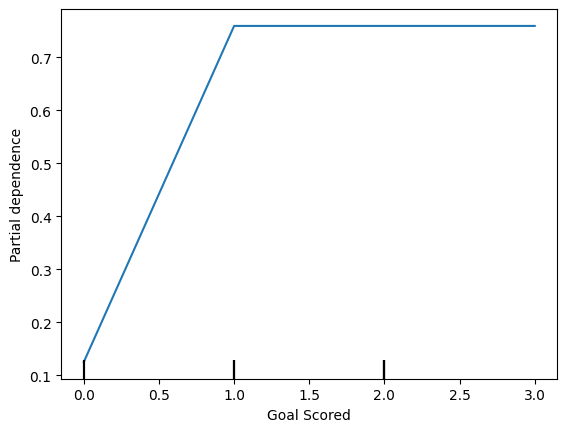

In [5]:
from matplotlib import pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

#create plot
disp1 = PartialDependenceDisplay.from_estimator(tree_model, val_X, ['Goal Scored'])
plt.show()

- Inference from graph- 

> scoring a gaol makes a person 'Man of the match'

> But extra goal seems to have no impact. 

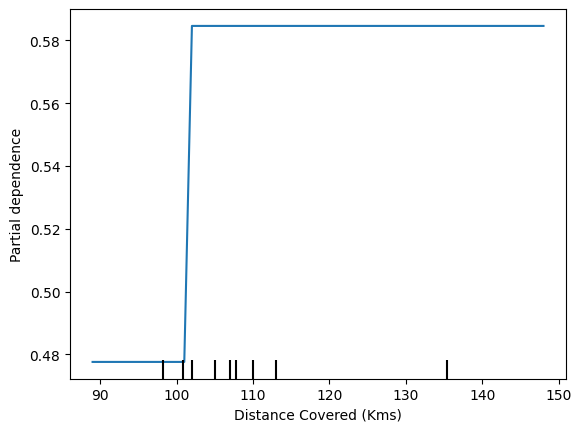

In [6]:
feature_to_plot = 'Distance Covered (Kms)'

disp2 = PartialDependenceDisplay.from_estimator (tree_model, val_X, [feature_to_plot])
plt.show()

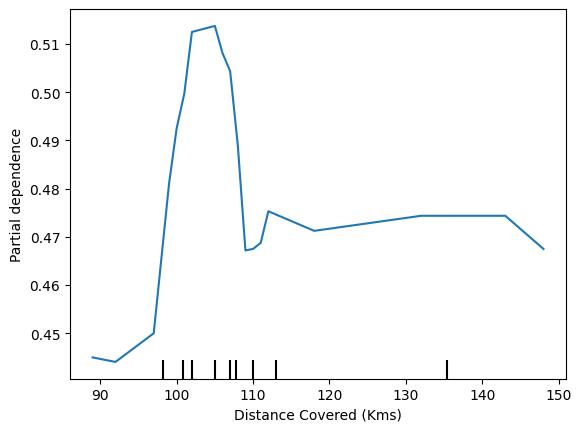

In [8]:
# same plot with Random_forest

rf_model = RandomForestClassifier(random_state = 0).fit(train_X, train_y)

disp3 = PartialDependenceDisplay.from_estimator(rf_model, val_X, [feature_to_plot])
plt.show()

- Inference

> The above graphs feature that if a player covers 100 kms, he becomes 'Man of the match'

> 1st model- DecisionTreeClassifier

> 2nd model - RandomForestClassifier

<a id="1"></a>
 <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 2. 2D Partial Dependence Plots </b></div>

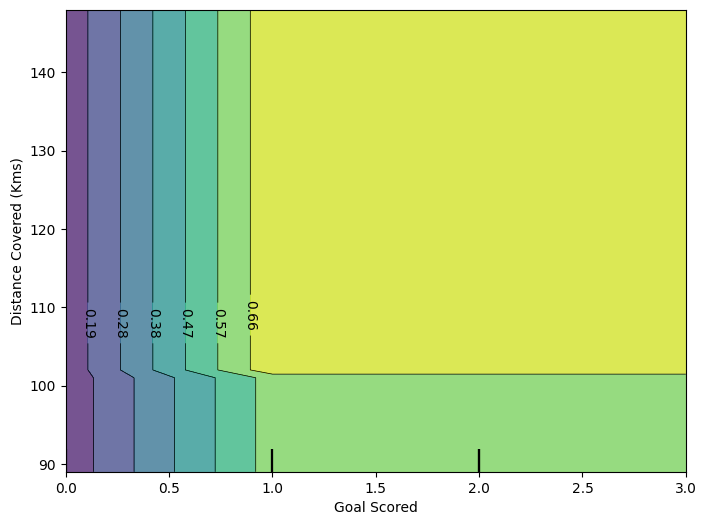

In [9]:
fig, ax = plt.subplots(figsize = (8,6))
f_names = [{"Goal Scored", "Distance Covered (Kms)"}]

# simiar to previous, except use use tuple features
disp4 = PartialDependenceDisplay.from_estimator(tree_model, val_X, f_names, ax = ax)
plt.show()

<a id="1"></a>
 <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 3. Practice exercise </b></div>

In [16]:
# import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# load data
data2 = pd.read_csv('train.csv')

# Remove data with extreme outlier coordinates or negative fares
data2 = data2.query('pickup_latitude > 40.7 and pickup_latitude < 40.8 and ' +
                  'dropoff_latitude > 40.7 and dropoff_latitude < 40.8 and ' +
                  'pickup_longitude > -74 and pickup_longitude < -73.9 and ' +
                  'dropoff_longitude > -74 and dropoff_longitude < -73.9 and ' +
                  'fare_amount > 0'
                  )

y = data2.fare_amount

base_features = ['pickup_longitude',
                 'pickup_latitude',
                 'dropoff_longitude',
                 'dropoff_latitude']

X = data2[base_features]

# train the model
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
first_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(train_X, train_y)
print("Data sample:")
data2.head()

Data sample:


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1


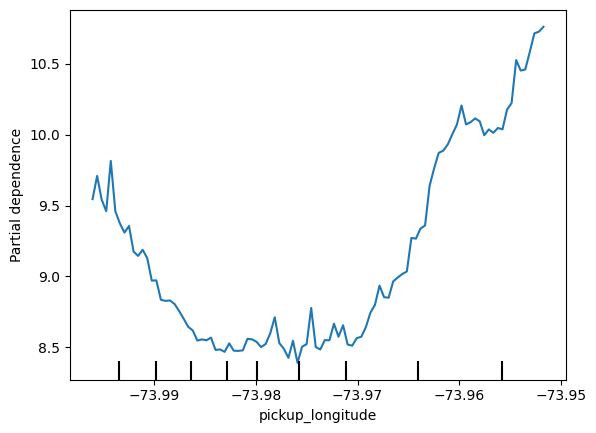

In [19]:
feature_name = 'pickup_longitude'

PartialDependenceDisplay.from_estimator (first_model, val_X, [feature_name])
plt.show()

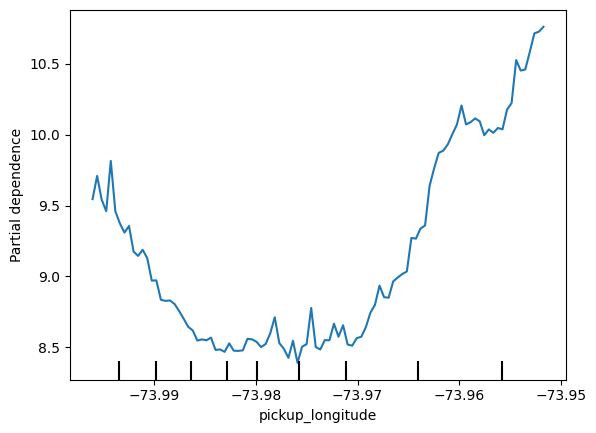

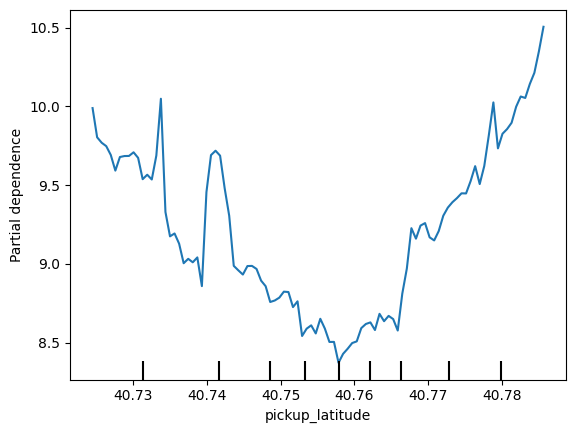

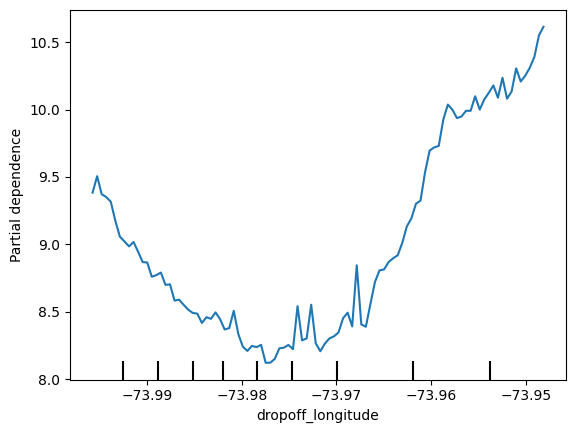

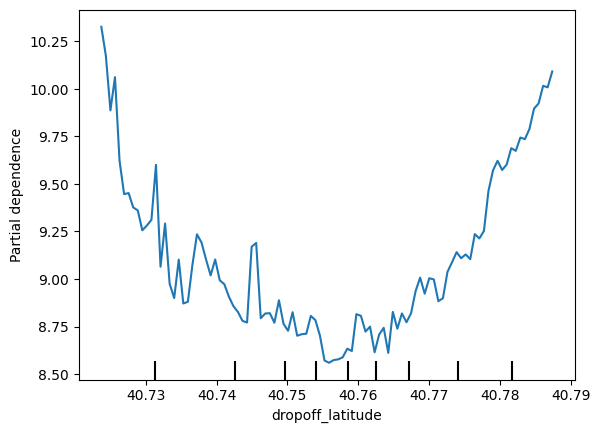

In [20]:
# apply 'for' loop for all base_features

for feature_name in base_features:
    PartialDependenceDisplay.from_estimator(first_model, val_X,  [feature_name])
    plt.show()

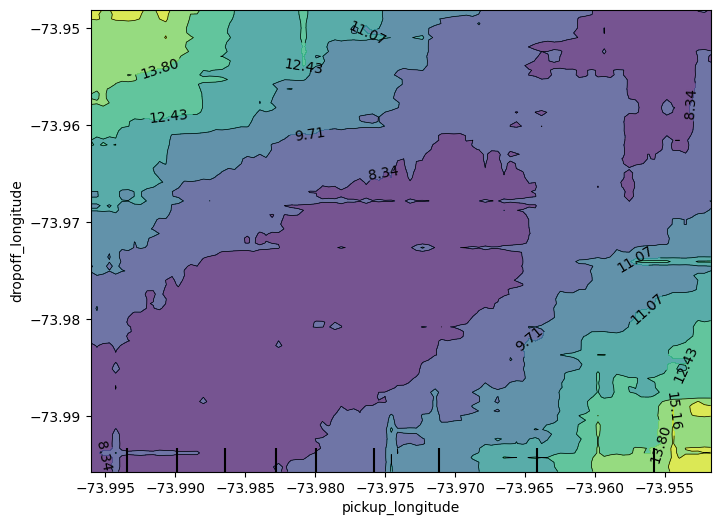

In [22]:
# 2D partial Dependence plots
fig, ax = plt.subplots(figsize = (8, 6))

feature_names = [('pickup_longitude', 'dropoff_longitude')]
PartialDependenceDisplay.from_estimator (first_model, val_X, feature_names, ax= ax)

Consider a scenario where you have only 2 predictive features, which we will call feat_A and feat_B. 

Both features have minimum values of -1 and maximum values of 1. The partial dependence plot for feat_A increases steeply over its whole range, whereas the partial dependence plot for feature B increases at a slower rate (less steeply) over its whole range.

__Does this guarantee that feat_A will have a higher permutation importance than feat_B? Why or why not___

No. This doesn't guarantee feat_a is more important. For example, feat_a could have a big effect in the cases where it varies, but could have a single value 99% of the time. In that case, permuting feat_a wouldn't matter much, since most values would be unchanged.

1. Creates two features, X1 and X2, having random values in the range [-2, 2].
2. Creates a target variable y, which is always 1.
3. Trains a RandomForestRegressor model to predict y given X1 and X2.
4. Creates a PDP plot for X1 and a scatter plot of X1 vs. y.

    __Do you have a prediction about what the PDP plot will look like?__



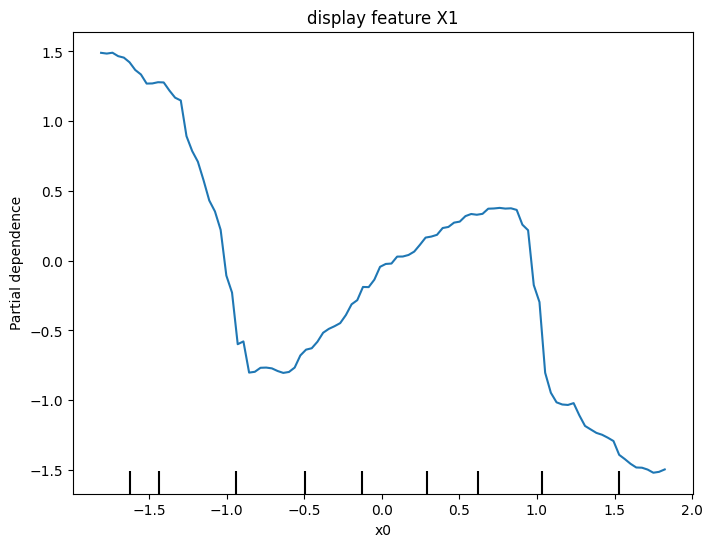

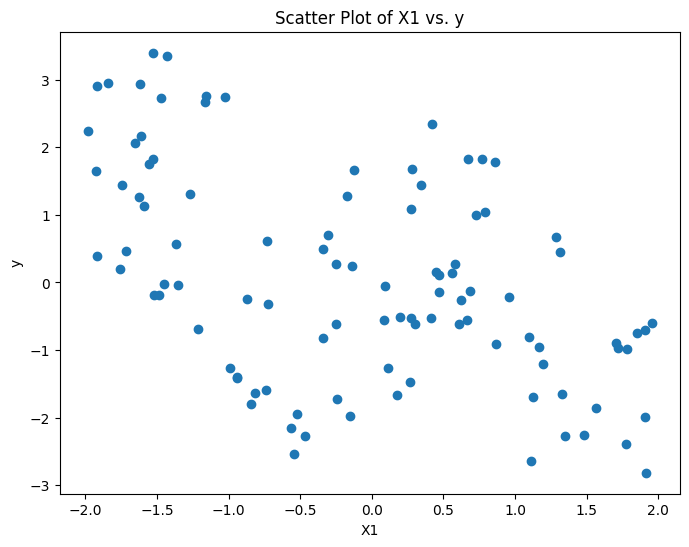

In [34]:
# import libraries
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# generate random data
np.random.seed(0) # for reproducibiity
X1 = np.random.uniform(-2, 2, 100)
X2 = np.random.uniform(-2, 2, 100)
X = np.column_stack([X1, X2])

# create target variable y
#y = np.ones([X.shape[0]])
y = -2 * X1 * (X1<-1) + X1 - 2 * X1 * (X1>1) - X2

# train RandomForestRegressor
model = RandomForestRegressor()
model.fit(X,y)

# plot
fix, ax = plt.subplots(figsize =(8, 6))
PartialDependenceDisplay.from_estimator (model, X, features = [0], ax= ax)
ax.set_title('display feature X1')
plt.show()

# Scatter Plot of X1 vs. y
plt.figure(figsize=(8, 6))
plt.scatter(X1, y)
plt.title("Scatter Plot of X1 vs. y")
plt.xlabel("X1")
plt.ylabel("y")
plt.show()